<a href="https://colab.research.google.com/github/LeelaSanjeev12/Leela/blob/main/Task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Task 02:Stock Market Prediction and Forecasting Using Stacked LSTM

Import the libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


Importing the Dataset

In [ ]:
# Load the data
data = pd.read_csv(r'/content/gdrive/My Drive/data1.csv')

Preprocessing the Data

In [ ]:
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(data['Close'].values.reshape(-1,1))

Splitting the data into Training and Testing

In [ ]:
# Split the data into train and test setss
train_size = int(len(scaled_data) * 0.8)
train_data=scaled_data[:train_size]
test_data=scaled_data[train_size:]

Prepare data for LSTM

In [ ]:
def creating_dataset(dataset,time_steps=1):
  x,y=[],[]
  for i in range(len(dataset)-time_steps-1):
    x.append(dataset[i:(i+time_steps),0])
    y.append(dataset[i+time_steps,0])
  return np.array(x),np.array(y)

In [ ]:
time_steps=10
x_train,y_train=creating_dataset(train_data,time_steps)
x_test,y_test=creating_dataset(test_data,time_steps)

Build the stacked LSTM model

In [ ]:
model=Sequential()
model.add(LSTM(units=50,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50))
model.add(Dense(units=1))
model.compile(optimizer='adam',loss='mean_squared_error')

Train the Model

In [ ]:
model.fit(x_train,y_train,epochs=50,batch_size=32)

Epoch 1/50
51/51 [==============================] - 0s 10ms/step - loss: 8.1642e-04
Epoch 2/50
51/51 [==============================] - 1s 10ms/step - loss: 8.1855e-04
Epoch 3/50
51/51 [==============================] - 0s 10ms/step - loss: 7.4932e-04
Epoch 4/50
51/51 [==============================] - 1s 14ms/step - loss: 7.7295e-04
Epoch 5/50
51/51 [==============================] - 1s 13ms/step - loss: 7.4270e-04
Epoch 6/50
51/51 [==============================] - 1s 13ms/step - loss: 6.8317e-04
Epoch 7/50
51/51 [==============================] - 1s 14ms/step - loss: 6.8297e-04
Epoch 8/50
51/51 [==============================] - 1s 11ms/step - loss: 6.6874e-04
Epoch 9/50
51/51 [==============================] - 1s 10ms/step - loss: 6.8021e-04
Epoch 10/50
51/51 [==============================] - 0s 9ms/step - loss: 6.2832e-04
Epoch 11/50
51/51 [==============================] - 0s 9ms/step - loss: 6.2828e-04
Epoch 12/50
51/51 [==============================] - 0s 10ms/step - loss: 5.

Make predictions on Testing data

In [ ]:
predict=model.predict(x_test)
predict=scaler.inverse_transform(predict)

13/13 [==============================] - 1s 4ms/step


Print the Predicted Values

In [ ]:
print('Predicted Values:')
print(predict)

Predicted Values:
[[119.63873 ]
 [119.8418  ]
 [120.5615  ]
 [121.038704]
 [121.10011 ]
 [121.36595 ]
 [120.42682 ]
 [121.553276]
 [120.07184 ]
 [116.8087  ]
 [115.89228 ]
 [117.59641 ]
 [114.62636 ]
 [111.76497 ]
 [109.56762 ]
 [104.24472 ]
 [100.38388 ]
 [ 97.68535 ]
 [ 95.68065 ]
 [ 94.23811 ]
 [ 93.73356 ]
 [ 94.08548 ]
 [ 94.20668 ]
 [ 95.81865 ]
 [ 97.61669 ]
 [ 97.06962 ]
 [ 95.66227 ]
 [ 94.58449 ]
 [ 94.420425]
 [ 94.23581 ]
 [ 94.24311 ]
 [ 94.35913 ]
 [ 94.32021 ]
 [ 95.11599 ]
 [ 95.44317 ]
 [ 94.16043 ]
 [ 92.67881 ]
 [ 91.72279 ]
 [ 90.26609 ]
 [ 89.49487 ]
 [ 89.458084]
 [ 89.63213 ]
 [ 90.2354  ]
 [ 89.38015 ]
 [ 88.01263 ]
 [ 86.840065]
 [ 86.84847 ]
 [ 88.400406]
 [ 88.94372 ]
 [ 89.51628 ]
 [ 89.38878 ]
 [ 89.91688 ]
 [ 90.39277 ]
 [ 91.10684 ]
 [ 91.498825]
 [ 92.12342 ]
 [ 91.22894 ]
 [ 88.69075 ]
 [ 86.80986 ]
 [ 85.66918 ]
 [ 84.39033 ]
 [ 83.88018 ]
 [ 83.25169 ]
 [ 83.45037 ]
 [ 83.53178 ]
 [ 83.74465 ]
 [ 83.87874 ]
 [ 84.381226]
 [ 85.510635]
 [ 87.085075]
 [

Visualizing the Results

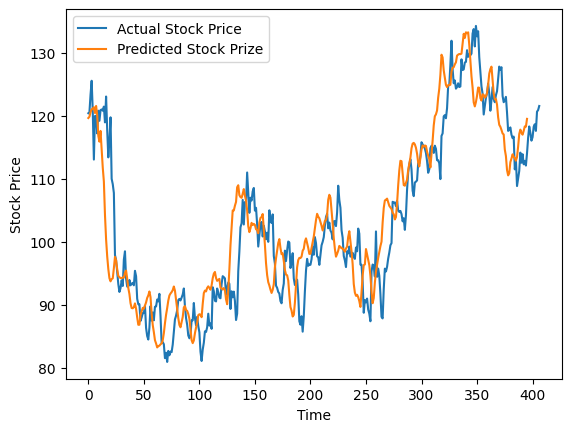

In [ ]:
plt.plot(scaler.inverse_transform(test_data),label='Actual Stock Price')
plt.plot(predict,label='Predicted Stock Prize')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()